## Dataset Information

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

## Import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score



warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading the dataset

In [ ]:
df = pd.read_csv('Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


## Preprocessing the dataset

In [ ]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
# # remove twitter handles (@user)
# df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [ ]:
# df.head()

In [ ]:
# # remove special characters, numbers and punctuations
# df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
# df.head()

In [ ]:
# remove short words
# data['clean_comment'] = data['clean_comment'].fillna('').apply(preprocess)
# df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
# df.head()

In [ ]:
# individual words considered as tokens
tokenized_tweet = df['clean_text'].fillna('').apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, modi, promised, “minimum, government, m...
1    [talk, all, the, nonsense, and, continue, all,...
2    [what, did, just, say, vote, for, modi, welcom...
3    [asking, his, supporters, prefix, chowkidar, t...
4    [answer, who, among, these, the, most, powerfu...
Name: clean_text, dtype: object

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, modi, promis, “minimum, govern, maximum...
1    [talk, all, the, nonsens, and, continu, all, t...
2    [what, did, just, say, vote, for, modi, welcom...
3    [ask, hi, support, prefix, chowkidar, their, n...
4    [answer, who, among, these, the, most, power, ...
Name: clean_text, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_text'] = tokenized_tweet
df.head()

,clean_text,category
0,when modi promis “minimum govern maximum gover...,-1.0
1,talk all the nonsens and continu all the drama...,0.0
2,what did just say vote for modi welcom bjp tol...,1.0
3,ask hi support prefix chowkidar their name mod...,1.0
4,answer who among these the most power world le...,1.0


## Exploratory Data Analysis

In [ ]:
# !pip install wordcloud

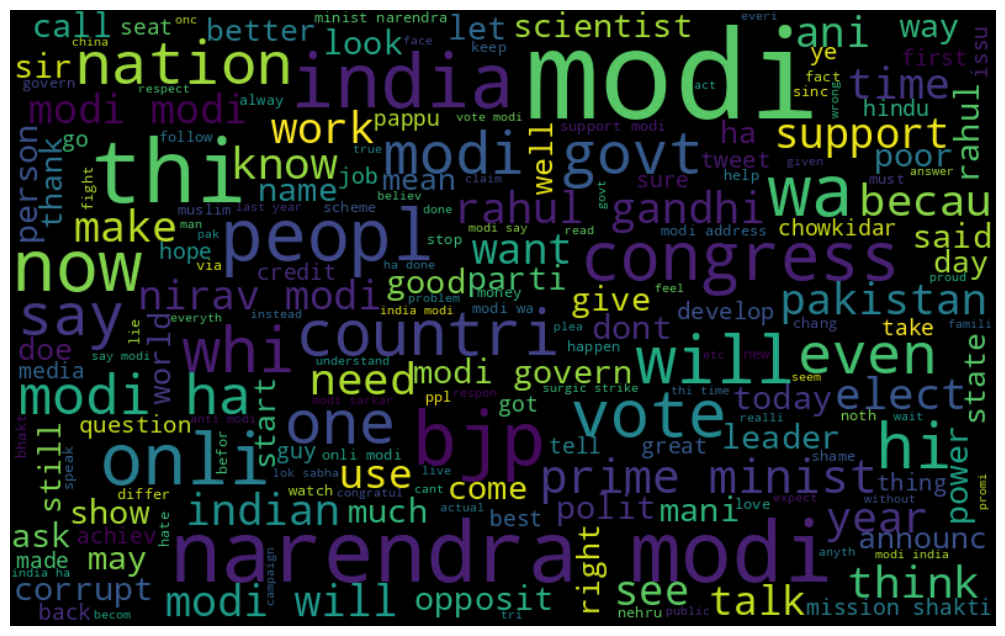

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

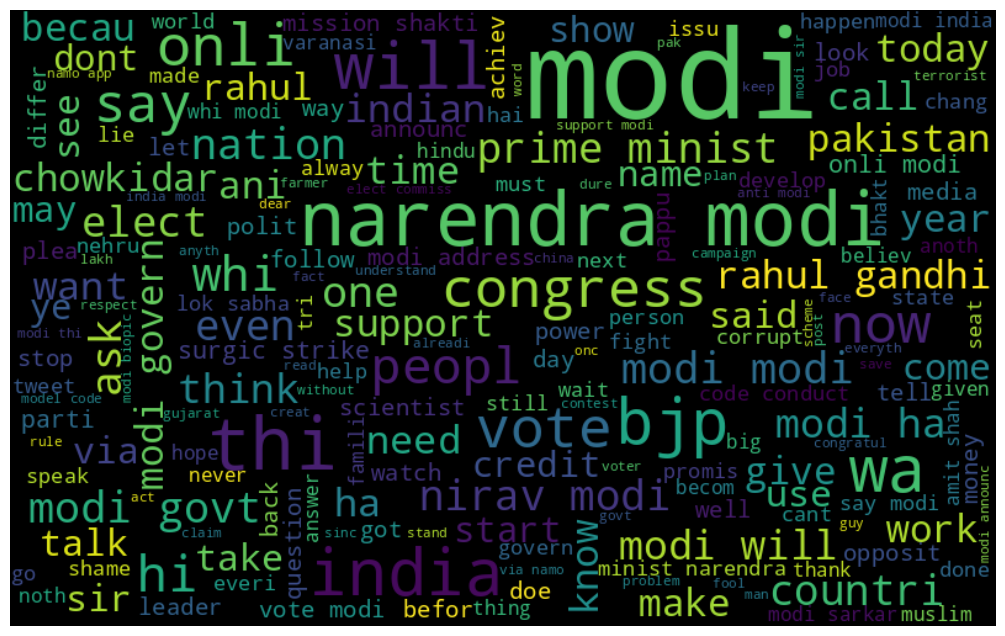

In [ ]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_text'][df['category']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

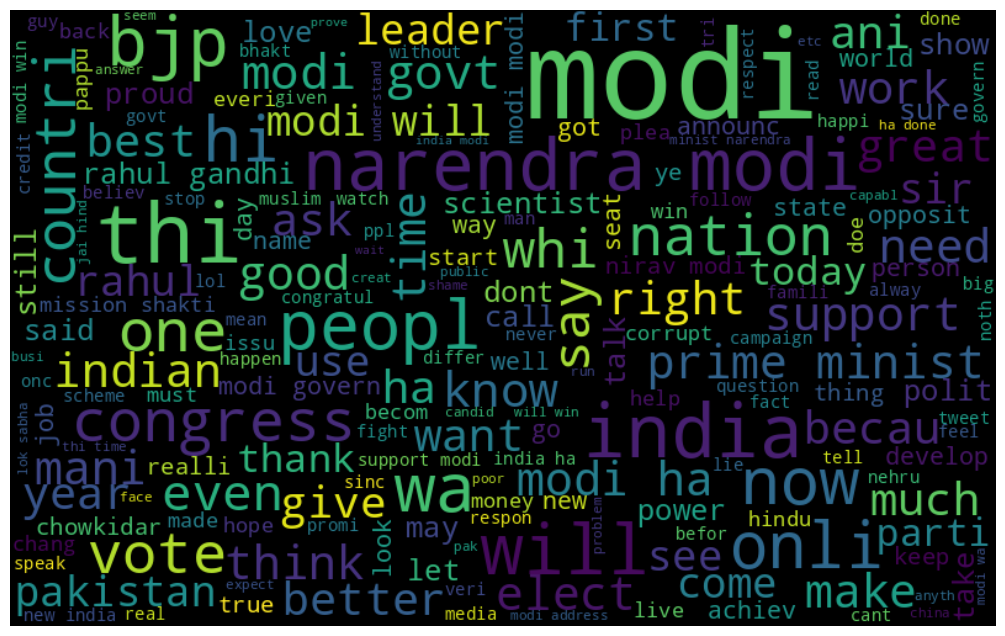

In [ ]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_text'][df['category']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# # extract the hashtag
# def hashtag_extract(tweets):
#     hashtags = []
#     # loop words in the tweet
#     for tweet in tweets:
#         ht = re.findall(r"#(\w+)", tweet)
#         hashtags.append(ht)
#     return hashtags    

In [ ]:
# extract hashtags from non-racist/sexist tweets
# ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# # extract hashtags from racist/sexist tweets
# ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [ ]:
# ht_positive[:5]

In [ ]:
# # unnest list
# ht_positive = sum(ht_positive, [])
# ht_negative = sum(ht_negative, [])

In [ ]:
# ht_positive[:5]

In [ ]:
# freq = nltk.FreqDist(ht_positive)
# d = pd.DataFrame({'Hashtag': list(freq.keys()),
#                  'Count': list(freq.values())})
# d.head()

In [ ]:
# select top 10 hashtags
# d = d.nlargest(columns='Count', n=10)
# plt.figure(figsize=(15,9))
# sns.barplot(data=d, x='Hashtag', y='Count')
# plt.show()

In [ ]:
# freq = nltk.FreqDist(ht_negative)
# d = pd.DataFrame({'Hashtag': list(freq.keys()),
#                  'Count': list(freq.values())})
# d.head()

In [ ]:
# select top 10 hashtags
# d = d.nlargest(columns='Count', n=10)
# plt.figure(figsize=(15,9))
# sns.barplot(data=d, x='Hashtag', y='Count')
# plt.show()

## Input Split

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_text'])
df.dropna(inplace=True)


In [ ]:
# bow[0].toarray()

In [ ]:
from sklearn.model_selection import train_test_split
# Drop null values in 'category'
df = df.dropna(subset=['category'])

# Check for duplicates in 'category'
df = df.drop_duplicates(subset=['category'])

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df['clean_text'])

# Reset index of 'df'
df = df.reset_index(drop=True)
x_train, x_test, y_train, y_test = train_test_split(bow, df['category'], random_state=1, test_size=0.25)

# y_train = y_train.dropna()
# y_test = y_test.dropna()
# df.dropna(inplace=True)


## Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred, average='macro')

0.7357260601445601

In [ ]:
accuracy_score(y_test,pred)

0.7497995991983968

In [ ]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred, average='macro')


0.09450047606293326

In [ ]:
accuracy_score(y_test,pred)

0.12565130260521043

In [ ]:
pred_prob[0][1] >= 0.3

True

## Naive Bayes
**bold text**

In [ ]:
# # Vectorize the data
# vectorizer = CountVectorizer()

# x_train_counts = vectorizer.fit_transform(x_train)
# x_train_counts = vectorizer.fit_transform(x_train.values.astype('U'))
# tfidf_transformer = TfidfTransformer()
# x_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# # Train a Naive Bayes model
# nb = MultinomialNB()
# nb.fit(x_train_tfidf, y_train)

# # Test the model
# X_test_counts = vectorizer.transform(x_test)
# X_test_tfidf = tfidf_transformer.transform(X_test_counts)
# y_pred = nb.predict(X_test_tfidf)

# # Evaluate the model
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))



AttributeError: ignored